In [2]:
#1. Introduction

In [4]:
# Microsoft (MSFT) Stock Analysis Project

#This project focuses on exploring the historical stock data of Microsoft (MSFT). We aim to analyze price patterns, market behavior, and risk to derive insights for investment decision-making. The analysis is performed using feature engineering, correlation matrices, and risk metrics.


In [6]:
#2. Load and Explore the Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('/Users/ummesaburanishad/Downloads/Oeson1.xlsx')
df.head()


,Time,Open,High,Low,Close,Adj Close,Volume,MS%change
0,2018-01-02,86.129997,86.309998,85.500000,85.949997,80.940384,22483800,NaN
1,2018-01-03,86.059998,86.510002,85.970001,86.349998,81.317093,26061400,-0.000813
2,2018-01-04,86.589996,87.660004,86.570000,87.110001,82.032776,21912000,0.006158
3,2018-01-05,87.660004,88.410004,87.430000,88.190002,83.049843,23407100,0.012357
4,2018-01-08,88.199997,88.580002,87.599998,88.279999,83.134590,22113000,0.006160


In [9]:
# Convert 'time' to datetime and set it as index.
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

In [10]:
#3. Feature Engineering

In [11]:
# Price-based features
df['Price_Change'] = df['Close'] - df['Open']
df['Price_Change_%'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['Price_Range'] = df['High'] - df['Low']
df['Gap'] = df['Open'] - df['Close'].shift(1)

# Volatility and lag features
df['Volatility5'] = df['MS%change'].rolling(5).std()
df['Lag1'] = df['MS%change'].shift(1)
df['Lag2'] = df['MS%change'].shift(2)


In [12]:
print(df)

                  Open        High         Low       Close   Adj Close  \
Time                                                                     
2018-01-02   86.129997   86.309998   85.500000   85.949997   80.940384   
2018-01-03   86.059998   86.510002   85.970001   86.349998   81.317093   
2018-01-04   86.589996   87.660004   86.570000   87.110001   82.032776   
2018-01-05   87.660004   88.410004   87.430000   88.190002   83.049843   
2018-01-08   88.199997   88.580002   87.599998   88.279999   83.134590   
...                ...         ...         ...         ...         ...   
2023-01-24  242.500000  243.949997  240.440002  242.039993  242.039993   
2023-01-25  234.479996  243.300003  230.899994  240.610001  240.610001   
2023-01-26  243.649994  248.309998  242.000000  248.000000  248.000000   
2023-01-27  248.990005  249.830002  246.830002  248.160004  248.160004   
2023-01-30  244.509995  245.600006  242.199997  242.710007  242.710007   

              Volume  MS%change  Pric

In [13]:
#4. Exploratory Data Analysis (EDA)

In [14]:
# Cleaned summary
summary_stats = df[['Open', 'Close', 'Volume', 'MS%change', 'Price_Change', 'Price_Change_%']].describe().round(2)
print(summary_stats)


          Open    Close        Volume  MS%change  Price_Change  Price_Change_%
count  1278.00  1278.00  1.278000e+03    1277.00       1278.00         1278.00
mean    194.47   194.51  3.026779e+07       0.00          0.04            0.03
std      74.23    74.24  1.284702e+07       0.02          3.11            1.50
min      86.06    85.01  8.989200e+06      -0.08        -15.67           -5.92
25%     120.21   120.20  2.221248e+07      -0.01         -1.37           -0.76
50%     203.58   203.05  2.706270e+07       0.00          0.14            0.08
75%     255.48   254.21  3.437208e+07       0.01          1.53            0.91
max     344.62   343.11  1.112421e+08       0.08         22.08            8.10


In [15]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix with 2 decimal places
print(corr_matrix.round(2))

                Open  High   Low  Close  Adj Close  Volume  MS%change  \
Open            1.00  1.00  1.00   1.00       1.00   -0.06      -0.00   
High            1.00  1.00  1.00   1.00       1.00   -0.05      -0.01   
Low             1.00  1.00  1.00   1.00       1.00   -0.08      -0.00   
Close           1.00  1.00  1.00   1.00       1.00   -0.07      -0.00   
Adj Close       1.00  1.00  1.00   1.00       1.00   -0.06      -0.01   
Volume         -0.06 -0.05 -0.08  -0.07      -0.06    1.00      -0.11   
MS%change      -0.00 -0.01 -0.00  -0.00      -0.01   -0.11       1.00   
Price_Change   -0.02  0.00  0.00   0.02       0.02   -0.07      -0.06   
Price_Change_% -0.01  0.00  0.01   0.03       0.03   -0.08      -0.07   
Price_Range     0.55  0.56  0.53   0.55       0.55    0.56      -0.12   
Gap            -0.01 -0.01 -0.01  -0.01      -0.01   -0.05       0.55   
Volatility5     0.05  0.05  0.04   0.05       0.05    0.50      -0.01   
Lag1           -0.00 -0.01 -0.00  -0.01      -0.01 

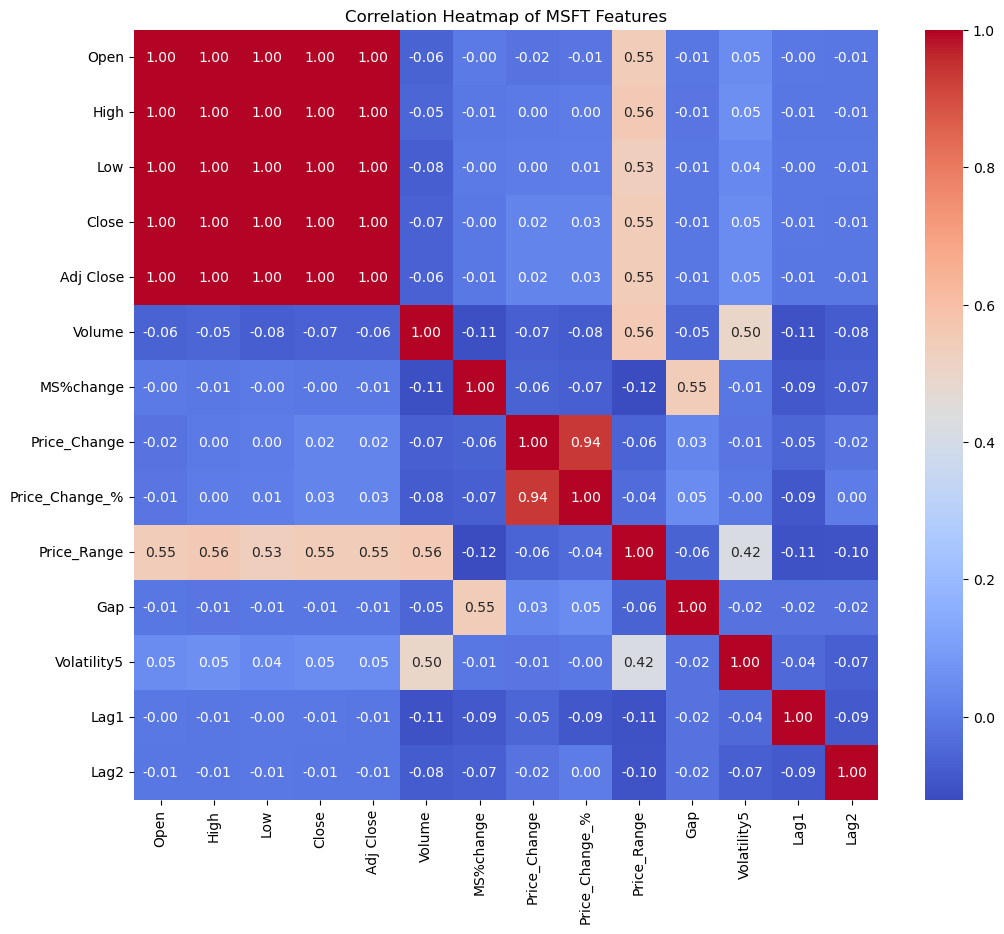

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of MSFT Features')
plt.show()


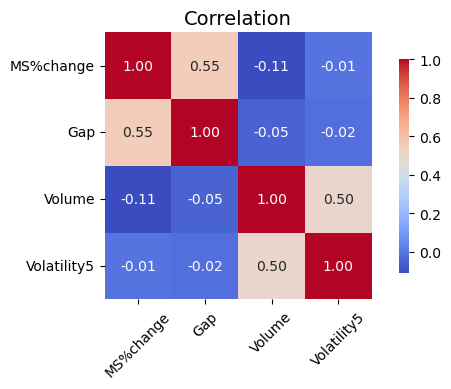

In [17]:
# Select only the relevant columns for focused analysis
selected_cols = ['MS%change', 'Gap', 'Volume','Volatility5']

# Calculate Pearson correlation matrix for selected features
corr_focus = df[selected_cols].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_focus, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
print(corr_focus)

             MS%change       Gap    Volume  Volatility5
MS%change     1.000000  0.548557 -0.108792    -0.008761
Gap           0.548557  1.000000 -0.051077    -0.022114
Volume       -0.108792 -0.051077  1.000000     0.499732
Volatility5  -0.008761 -0.022114  0.499732     1.000000


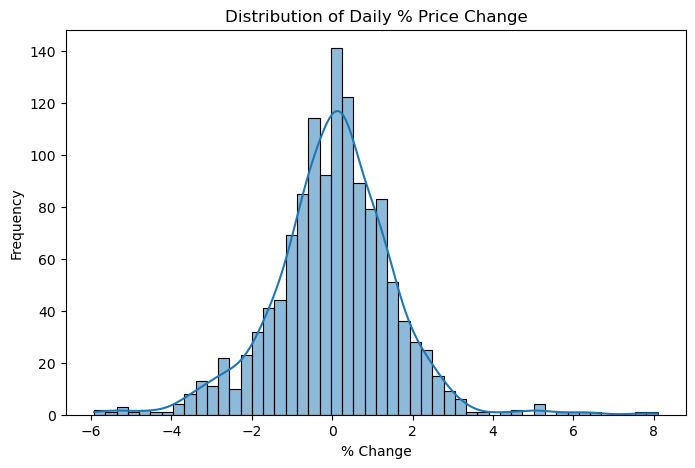

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price_Change_%'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily % Price Change')
plt.xlabel('% Change')
plt.ylabel('Frequency')
plt.show()


In [32]:
#4.3 Volatility and Volume

In [34]:
# Rolling volatility (20-day window)
df['Volatility5'] = df['Price_Change_%'].rolling(window=20).std()

# Pearson correlation between rolling volatility and volume
vol_vol_corr = df[['Volatility5', 'Volume']].corr().loc['Volatility5', 'Volume']
print(f"Correlation between 20-day volatility and Volume: {vol_vol_corr:.2f}")


Correlation between 20-day volatility and Volume: 0.53


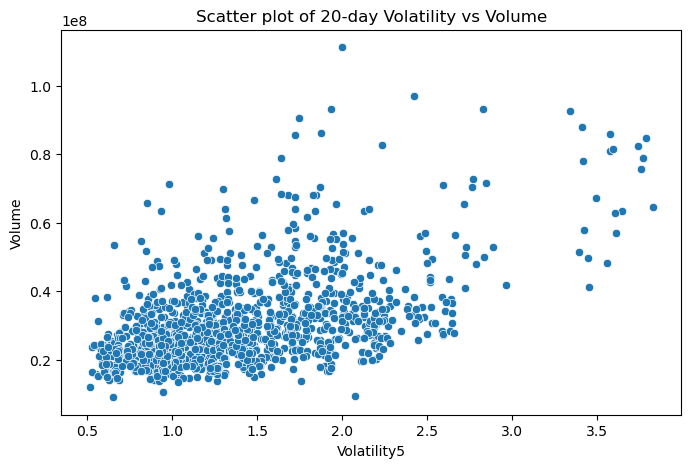

In [36]:
#Scatter plot for visualization
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Volatility5', y='Volume')
plt.title('Scatter plot of 20-day Volatility vs Volume')
plt.show()


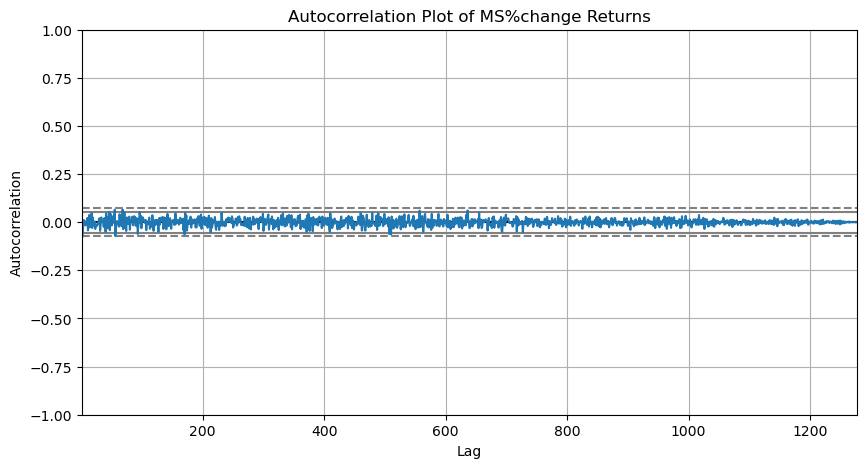

In [39]:
#4.4 Lag and Momentum
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,5))
autocorrelation_plot(df['MS%change'].dropna())
plt.title('Autocorrelation Plot of MS%change Returns')
plt.show()

In [42]:
print("Correlation with Lag1:", df['MS%change'].corr(df['Lag1']))
print("Correlation with Lag2:", df['MS%change'].corr(df['Lag2']))


Correlation with Lag1: -0.08637420615730566
Correlation with Lag2: -0.06940575752428121


In [45]:
#5. Risk Analysis

#Value at Risk (VaR) - 95% Confidence

VaR_95 = df['MS%change'].quantile(0.05)
print(f"Value at Risk (95% confidence): {VaR_95:.2f}%")

Value at Risk (95% confidence): -0.03%


In [47]:
#Maximum Drawdown

cumulative = (1 + df['MS%change'] / 100).cumprod()
drawdown = (cumulative - cumulative.cummax()) / cumulative.cummax()
max_drawdown = drawdown.min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")

Maximum Drawdown: -0.40%


In [49]:
#Volatility Clustering

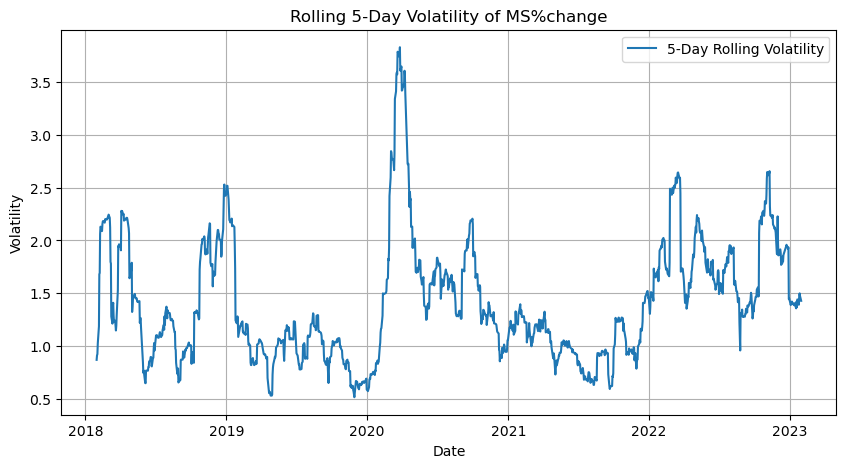

In [51]:

plt.figure(figsize=(10, 5))
plt.plot(df['Volatility5'], label='5-Day Rolling Volatility')
plt.title('Rolling 5-Day Volatility of MS%change')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
#Autocorrelation of Returns (Momentum Risk)

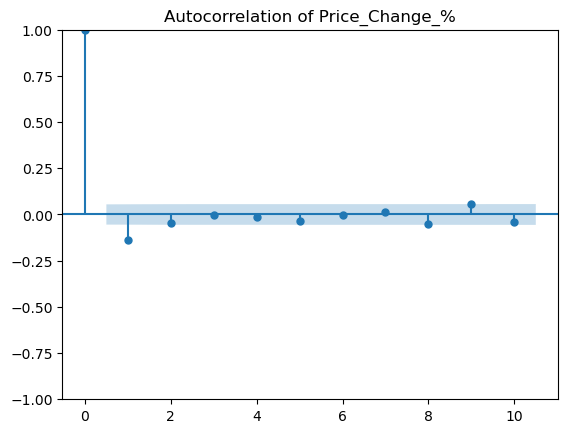

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Price_Change_%'].dropna(), lags=10)
plt.title('Autocorrelation of Price_Change_%')
plt.show()


In [56]:
risk_cols = ['Gap', 'Volatility5', 'Price_Range', 'Lag1', 'Lag2']
print(df[risk_cols].describe().T)


              count      mean       std        min       25%       50%  \
Gap          1277.0  0.082937  2.315354 -19.490006 -0.720001  0.160004   
Volatility5  1259.0  1.408782  0.573807   0.514711  0.979719  1.277130   
Price_Range  1278.0  4.220829  2.930874   0.540001  1.979995  3.509995   
Lag1         1276.0  0.000995  0.018016  -0.084075 -0.008129  0.001231   
Lag2         1275.0  0.000978  0.018013  -0.084075 -0.008135  0.001227   

                  75%        max  
Gap          1.010002  19.500000  
Volatility5  1.729368   3.831556  
Price_Range  5.597481  23.640015  
Lag1         0.011061   0.084640  
Lag2         0.011053   0.084640  
